In [ ]:
!pip install rarfile
!pip install tensorflow
!pip install keras

In [ ]:
import os
import shutil
import rarfile
from sklearn.model_selection import train_test_split  # type: ignore


# Step 1: Extract the .rar file and access the folder
def extract_rar(rar_path, extract_to):
    print(f"Extracting RAR file: {rar_path}")
    with rarfile.RarFile(rar_path) as rf:
        for file in rf.namelist():
            print(f"Extracting file: {file} to {extract_to}")
        rf.extractall(extract_to)
    print(f"Extraction completed. Files are extracted to: {extract_to}")


# Step 2: Split the Data into Training, Test, and Validation Sets
def split_data(data_dir, train_dir, test_dir, val_dir, train_ratio=0.8, test_ratio=0.18, val_ratio=0.02):
    # Create subfolders for training, test, and validation
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Create subfolders for Normal and Abnormal categories
    os.makedirs(os.path.join(train_dir, 'Normal'), exist_ok=True)
    os.makedirs(os.path.join(train_dir, 'Abnormal'), exist_ok=True)
    os.makedirs(os.path.join(test_dir, 'Normal'), exist_ok=True)
    os.makedirs(os.path.join(test_dir, 'Abnormal'), exist_ok=True)
    os.makedirs(os.path.join(val_dir, 'Normal'), exist_ok=True)
    os.makedirs(os.path.join(val_dir, 'Abnormal'), exist_ok=True)

    # Get list of all images in the dataset
    normal_images = [os.path.join(data_dir, 'Normal', fname) for fname in os.listdir(os.path.join(data_dir, 'Normal'))]
    abnormal_images = [os.path.join(data_dir, 'Abnormal', fname) for fname in os.listdir(os.path.join(data_dir, 'Abnormal'))]

    # Split Normal and Abnormal images into train and temp (test + validation)
    normal_train, normal_temp = train_test_split(normal_images, test_size=1 - train_ratio, random_state=42)
    abnormal_train, abnormal_temp = train_test_split(abnormal_images, test_size=1 - train_ratio, random_state=42)

    # Further split temp data into test and validation
    normal_test, normal_val = train_test_split(normal_temp, test_size=val_ratio / (test_ratio + val_ratio), random_state=42)
    abnormal_test, abnormal_val = train_test_split(abnormal_temp, test_size=val_ratio / (test_ratio + val_ratio), random_state=42)

    # Function to copy images
    def copy_images(image_list, dest_dir, category):
        for image in image_list:
            if os.path.exists(image):
                dest_path = os.path.join(dest_dir, category, os.path.basename(image))
                print(f"Copying {image} to {dest_path}")
                shutil.copy(image, dest_path)
            else:
                print(f"File not found: {image}")

    # Move images to respective directories
    copy_images(normal_train, train_dir, 'Normal')
    copy_images(abnormal_train, train_dir, 'Abnormal')
    copy_images(normal_test, test_dir, 'Normal')
    copy_images(abnormal_test, test_dir, 'Abnormal')
    copy_images(normal_val, val_dir, 'Normal')
    copy_images(abnormal_val, val_dir, 'Abnormal')


# Main function to execute the process
def main():
    rar_file = '/content/drive/MyDrive/res50/160.rar'  # Path to your .rar file
    extract_folder = '/content/drive/MyDrive/res50/extract'  # Path where the .rar file will be extracted
    extract_rar(rar_file, extract_folder)

    # Paths for extracted data and split directories
    data_folder = os.path.join(extract_folder, '160')  # Replace '120' with the actual folder name if different
    train_folder = '/content/drive/MyDrive/res50/train'
    test_folder = '/content/drive/MyDrive/res50/test'
    val_folder = '/content/drive/MyDrive/res50/validation'

    split_data(data_folder, train_folder, test_folder, val_folder)


if __name__ == "__main__":
    main()


Streaming output truncated to the last 5000 lines.
Copying /content/drive/MyDrive/res50/extract/160/Normal/Normal-09799.png to /content/drive/MyDrive/res50/test/Normal/Normal-09799.png
Copying /content/drive/MyDrive/res50/extract/160/Normal/Normal-17377.png to /content/drive/MyDrive/res50/test/Normal/Normal-17377.png
Copying /content/drive/MyDrive/res50/extract/160/Normal/Normal-15910.png to /content/drive/MyDrive/res50/test/Normal/Normal-15910.png
Copying /content/drive/MyDrive/res50/extract/160/Normal/Normal-00964.png to /content/drive/MyDrive/res50/test/Normal/Normal-00964.png
Copying /content/drive/MyDrive/res50/extract/160/Normal/Normal-00698.png to /content/drive/MyDrive/res50/test/Normal/Normal-00698.png
Copying /content/drive/MyDrive/res50/extract/160/Normal/Normal-16828.png to /content/drive/MyDrive/res50/test/Normal/Normal-16828.png
Copying /content/drive/MyDrive/res50/extract/160/Normal/Normal-14786.png to /content/drive/MyDrive/res50/test/Normal/Normal-14786.png
Copying /co

Found 26627 images belonging to 2 classes.
Found 667 images belonging to 2 classes.
Found 5990 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


832/832 ━━━━━━━━━━━━━━━━━━━━ 1559s 2s/step - AUC: 0.6171 - Precision: 0.6644 - Recall: 0.7303 - accuracy: 0.6102 - loss: 3.5961 - val_AUC: 0.7717 - val_Precision: 0.5909 - val_Recall: 1.0000 - val_accuracy: 0.5922 - val_loss: 0.0690
Epoch 2/10
  1/832 ━━━━━━━━━━━━━━━━━━━━ 1:22 100ms/step - AUC: 0.7183 - Precision: 0.6667 - Recall: 0.8889 - accuracy: 0.6875 - loss: 0.0661

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7183 - Precision: 0.6667 - Recall: 0.8889 - accuracy: 0.6875 - loss: 0.0661 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0398
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 525s 625ms/step - AUC: 0.7143 - Precision: 0.7047 - Recall: 0.7623 - accuracy: 0.6621 - loss: 0.0518 - val_AUC: 0.7816 - val_Precision: 0.7601 - val_Recall: 0.7480 - val_accuracy: 0.7125 - val_loss: 0.0386
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - AUC: 0.6035 - Precision: 0.5714 - Recall: 0.7500 - accuracy: 0.5938 - loss: 0.0512 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.8889 - val_accuracy: 0.8889 - val_loss: 0.0241
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 912s 1s/step - AUC: 0.7297 - Precision: 0.7172 - Recall: 0.7747 - accuracy: 0.6793 - loss: 0.0404 - val_AUC: 0.8031 - val_Precision: 0.8328 - val_Recall: 0.6472 - val_accuracy: 0.7156 - val_loss: 0.0392
Epoch 6/10
832/832 ━━━━━━━━━

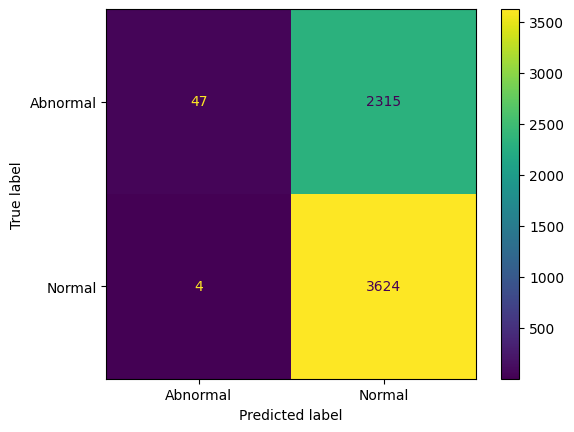

In [ ]:
#improved code for accuracy
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
import numpy as np
import tensorflow.keras.backend as K

# Step 1: Define Focal Loss
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        return -K.mean(alpha * K.pow(1 - pt, gamma) * K.log(pt))
    return loss

# Step 2: Preprocess the Data
def preprocess_data(train_dir, val_dir, test_dir, batch_size=32, img_size=(224, 224)):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        rotation_range=20,
        zoom_range=0.2,
        shear_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest'
    )

    val_test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True
    )

    validation_generator = val_test_datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False
    )

    test_generator = val_test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False
    )

    return train_generator, validation_generator, test_generator

# Step 3: Create the ResNet50 Model
def create_resnet50_model(img_size=(224, 224)):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

    # Unfreeze the last few layers for fine-tuning
    for layer in base_model.layers[:-20]:
        layer.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu', kernel_regularizer='l2'),
        layers.Dropout(0.6),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=1e-4), loss=focal_loss(), metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
    return model

# Step 4: Train the Model
def train_model(model, train_generator, validation_generator, class_weights, epochs=5):
    steps_per_epoch = train_generator.samples // train_generator.batch_size
    validation_steps = validation_generator.samples // validation_generator.batch_size

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    return history

# Step 5: Evaluate the Model
def evaluate_model(model, test_generator):
    test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(test_generator)

    print(f"Test Accuracy: {test_accuracy}")
    print(f"Test Precision: {test_precision}")
    print(f"Test Recall: {test_recall}")
    print(f"Test AUC: {test_auc}")
    print(f"Test Loss: {test_loss}")

    # Predictions for classification report and confusion matrix
    predictions = (model.predict(test_generator) > 0.5).astype(int)
    true_labels = test_generator.classes[:len(predictions)]

    f1 = f1_score(true_labels, predictions, average='weighted')
    print(f"Test F1-Score: {f1}")

    print(classification_report(true_labels, predictions, target_names=list(test_generator.class_indices.keys())))

    cm = confusion_matrix(true_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
    disp.plot()

# Step 6: Main Execution
def main():
    train_folder = '/content/drive/MyDrive/res50/train'
    val_folder = '/content/drive/MyDrive/res50/validation'
    test_folder = '/content/drive/MyDrive/res50/test'

    train_generator, validation_generator, test_generator = preprocess_data(train_folder, val_folder, test_folder)

    # Compute class weights to handle imbalance
    from sklearn.utils import class_weight
    class_weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights_dict = dict(enumerate(class_weights))

    # Create and train the model
    model = create_resnet50_model(img_size=(224, 224))
    train_model(model, train_generator, validation_generator, class_weights_dict, epochs=10)

    # Evaluate the model
    evaluate_model(model, test_generator)

if __name__ == "__main__":
    main()


Found 26627 images belonging to 2 classes.
Found 667 images belonging to 2 classes.
Found 5990 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


832/832 ━━━━━━━━━━━━━━━━━━━━ 1309s 1s/step - AUC: 0.7855 - Precision: 0.7672 - Recall: 0.7657 - accuracy: 0.7191 - loss: 0.3781 - val_AUC: 0.8644 - val_Precision: 0.9627 - val_Recall: 0.3422 - val_accuracy: 0.6047 - val_loss: 0.3905 - learning_rate: 1.0000e-05
Epoch 2/10
  1/832 ━━━━━━━━━━━━━━━━━━━━ 5:07 370ms/step - AUC: 0.8745 - Precision: 0.8421 - Recall: 0.8421 - accuracy: 0.8125 - loss: 0.3668

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8745 - Precision: 0.8421 - Recall: 0.8421 - accuracy: 0.8125 - loss: 0.3668 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 0.4444 - val_accuracy: 0.4444 - val_loss: 0.4163 - learning_rate: 1.0000e-05
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 1315s 2s/step - AUC: 0.9467 - Precision: 0.8957 - Recall: 0.9059 - accuracy: 0.8790 - loss: 0.3401 - val_AUC: 0.9798 - val_Precision: 0.9215 - val_Recall: 0.9655 - val_accuracy: 0.9312 - val_loss: 0.3226 - learning_rate: 1.0000e-05
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9818 - Precision: 1.0000 - Recall: 0.9091 - accuracy: 0.9375 - loss: 0.3240 - val_AUC: 0.0000e+00 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.3124 - learning_rate: 1.0000e-05
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 929s 1s/step - AUC: 0.9688 - Precision: 0.9229 - Recall: 0.9313 - accuracy: 0.9110 - loss: 0.3214 - val_AUC: 0.9858 - val_Precision: 0.9406 - val_Recal

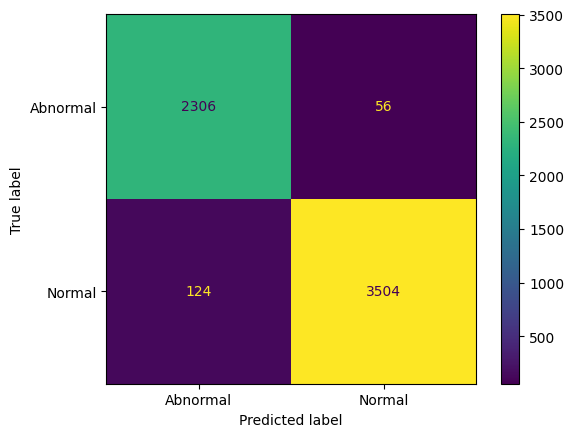

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.utils import class_weight
import numpy as np
import tensorflow.keras.backend as K

# Step 1: Define Focal Loss
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        return -K.mean(alpha * K.pow(1 - pt, gamma) * K.log(pt))
    return loss

# Step 2: Preprocess the Data
def preprocess_data(train_dir, val_dir, test_dir, batch_size=32, img_size=(224, 224)):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        rotation_range=30,
        zoom_range=0.3,
        shear_range=0.3,
        width_shift_range=0.3,
        height_shift_range=0.3,
        brightness_range=[0.7, 1.3],
        fill_mode='nearest'
    )

    val_test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True
    )

    validation_generator = val_test_datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False
    )

    test_generator = val_test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False
    )

    return train_generator, validation_generator, test_generator

# Step 3: Create the ResNet50 Model
def create_resnet50_model(img_size=(224, 224)):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

    # Unfreeze the last few layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = True

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=1e-5), loss=focal_loss(alpha=0.25, gamma=2.0), metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
    return model

# Step 4: Train the Model
def train_model(model, train_generator, validation_generator, class_weights, epochs=10):
    steps_per_epoch = train_generator.samples // train_generator.batch_size
    validation_steps = validation_generator.samples // validation_generator.batch_size

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

    history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        class_weight=class_weights,
        callbacks=[early_stopping, reduce_lr]
    )

    return history

# Step 5: Evaluate the Model
def evaluate_model(model, test_generator):
    test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(test_generator)

    print(f"Test Accuracy: {test_accuracy}")
    print(f"Test Precision: {test_precision}")
    print(f"Test Recall: {test_recall}")
    print(f"Test AUC: {test_auc}")
    print(f"Test Loss: {test_loss}")

    # Predictions for classification report and confusion matrix
    predictions = (model.predict(test_generator) > 0.5).astype(int)
    true_labels = test_generator.classes[:len(predictions)]

    f1 = f1_score(true_labels, predictions, average='weighted')
    print(f"Test F1-Score: {f1}")

    print(classification_report(true_labels, predictions, target_names=list(test_generator.class_indices.keys())))

    cm = confusion_matrix(true_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
    disp.plot()

    # ROC Curve
    y_pred_probs = model.predict(test_generator).ravel()
    fpr, tpr, _ = roc_curve(true_labels, y_pred_probs)
    roc_auc = auc(fpr, tpr)
    print(f"ROC AUC: {roc_auc}")

# Step 6: Main Execution
def main():
    train_folder = '/content/drive/MyDrive/res50/train'
    val_folder = '/content/drive/MyDrive/res50/validation'
    test_folder = '/content/drive/MyDrive/res50/test'

    train_generator, validation_generator, test_generator = preprocess_data(train_folder, val_folder, test_folder)

    # Compute class weights to handle imbalance
    class_weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights_dict = dict(enumerate(class_weights))

    # Create and train the model
    model = create_resnet50_model(img_size=(224, 224))
    train_model(model, train_generator, validation_generator, class_weights_dict, epochs=10)

    # Evaluate the model
    evaluate_model(model, test_generator)

if __name__ == "__main__":
    main()
